In [9]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np

In [26]:
caminhos_capturas = glob.glob("capturas/*.jpg")

In [84]:
dim = (6,6)
pontos_imagem = []
rotulos = []
imagens_casadas = []

for caminho in caminhos_capturas:
  imagem = cv2.imread(caminho)
  imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
  ret , corners , meta = cv2.findChessboardCornersSBWithMeta(imagem_gray, dim,  cv2.CALIB_CB_EXHAUSTIVE + cv2.CALIB_CB_LARGER + cv2.CALIB_CB_MARKER)
  if ret:
    pontos_imagem.append(corners)
    rotulos.append(meta)
    imagens_casadas.append(imagem_gray)

In [ ]:
cols = 3
lines = (len(imagens_casadas)+cols-1)//cols
fig, axes = plt.subplots(lines, cols, figsize=(2+6*cols,5*lines+2))
for i, c in enumerate(pontos_imagem):
    nova_imagem = np.array(imagens_casadas[i])
    cv2.drawChessboardCorners(nova_imagem, rotulos[i].shape, c, True)
    if lines > 1:
        axes[i//cols, i%cols].imshow(nova_imagem)
    else:
        axes[i%cols].imshow(nova_imagem)

In [127]:
pontos_mundo = []
for i, c in enumerate(pontos_imagem):
    l,a = rotulos[i].shape
    vp = []
    for n in range(l*a):
        vp.append([n//a,n%a,0])
    pontos_mundo.append(np.array(vp, dtype=np.float32))

In [132]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(np.array(pontos_mundo),pontos_imagem,(1280, 720), None, None)

C:\Users\Bernardo\AppData\Local\Temp/ipykernel_29468/1856505524.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(np.array(pontos_mundo),pontos_imagem,(1280, 720), None, None)


In [134]:
mtx

array([[1.64222467e+03, 0.00000000e+00, 6.96953510e+02],
       [0.00000000e+00, 4.98976483e+03, 4.40896150e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [136]:
erro_total = 0
for i in range(len(pontos_mundo)):
    imgpoints2, _ = cv2 . projectPoints(pontos_mundo[i], rvecs[i], tvecs[i], mtx, dist)
    erro = cv2 . norm(pontos_imagem[i], imgpoints2, cv2 . NORM_L2)/len(imgpoints2)
    erro_total += erro
    erro_medio = erro_total/len(pontos_mundo)
print(erro_medio)

0.8185389891685617


In [140]:
caminho

'capturas\\captura_ty8y2ny.jpg'

In [141]:
dist

array([[ 0.65810335, -3.59352299, -0.01526801, -0.00948064, -1.70562072]])

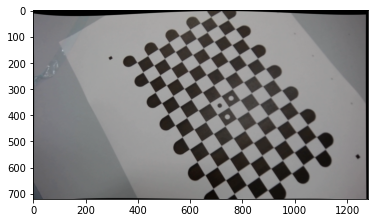

In [139]:
im = cv2.undistort(imagem, mtx , dist)
plt.imshow(im)